In [20]:
 

import numpy as np 
import pandas as pd 



import os
print(os.listdir("C:/Users/Hp/Documents/VGG16titanic"))



['.ipynb_checkpoints', '1d-convolutional-neural-network-starter.ipynb', 'gender_submission.csv', 'leaf', 'new', 'RFtitanic.ipynb', 'simple-keras-1d-cnn-features-split.ipynb', 'submission.csv', 'submissiontitanic.csv', 'SVCtitanic.ipynb', 'test.csv', 'titanic-cnn-failedmodel.ipynb', 'titanicsimple1d.ipynb', 'titanicsimpleCNN.ipynb', 'titanicusingconvolution.ipynb', 'titanicv2.ipynb', 'train.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'vgg16.ipynb', 'vgg16titanic.ipynb']


In [21]:
all_df = pd.read_csv('C:/Users/Hp/Documents/VGG16titanic/train.csv')
test=pd.read_csv('C:/Users/Hp/Documents/VGG16titanic/test.csv')

In [22]:
from sklearn.preprocessing import StandardScaler 
def PreprocessData(all_df):
    df = all_df.drop(['Survived','Name','Ticket','Cabin'],axis=1)
    age_mean = df['Age'].mean() 
    df['Age'] = df['Age'].fillna(age_mean) 
    fare_mean = df['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean) 
    df['Sex'] = df['Sex'].map({'female':0,'male':1}).astype(int)
    X_OneHot = pd.get_dummies(data=df,columns=['Embarked'])
    
    ss = StandardScaler()
    Features = ss.fit_transform(X_OneHot.values)
    
    Label = pd.get_dummies(all_df['Survived']).values
    
    return Features, Label

In [23]:
np.random.seed(10)
msk = np.random.rand(len(all_df)) < 0.7
train_df = all_df[msk]
test_df = all_df[~msk]
x_train, y_train = PreprocessData(train_df)
x_test, y_test = PreprocessData(test_df) 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten,Conv2D
from keras import optimizers

model = Sequential()
img_rows, img_cols = 5,2
print(x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],img_rows, img_cols,1))
print(x_train.shape)
x_test = np.reshape(x_test,(x_test.shape[0],img_rows, img_cols,1))
input_size = (img_rows,img_cols,1)
from keras import backend as K
K.set_image_dim_ordering('tf')

(615, 10)
(615, 5, 2, 1)


In [24]:

model = Sequential()
model.add(Conv2D(filters=1000,input_shape=input_size, kernel_size = (3,1),strides=(1,1),padding='valid',activation='relu'))
model.add(Conv2D(filters=500,kernel_size=(3,1),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=250,kernel_size = (1,1),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=125,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2,activation='softmax'))
model.summary()

Exception ignored in: <function BaseSession._Callable.__del__ at 0x000001BF4646B730>
Traceback (most recent call last):
  File "C:\Users\Hp\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Hp\Anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 1920960843336


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 3, 2, 1000)        4000      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 2, 500)         1500500   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 2, 500)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 2, 500)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 2, 250)         125250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 2, 250)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 2, 250)         0         
__________

In [25]:
model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])
train_history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=100,batch_size=30,verbose=2)

Train on 553 samples, validate on 62 samples
Epoch 1/100
 - 7s - loss: 0.6026 - acc: 0.6890 - val_loss: 0.4164 - val_acc: 0.8871
Epoch 2/100
 - 2s - loss: 0.5541 - acc: 0.7595 - val_loss: 0.5394 - val_acc: 0.7258
Epoch 3/100
 - 2s - loss: 0.5153 - acc: 0.7740 - val_loss: 0.4626 - val_acc: 0.7742
Epoch 4/100
 - 2s - loss: 0.4914 - acc: 0.7649 - val_loss: 0.3916 - val_acc: 0.8871
Epoch 5/100
 - 2s - loss: 0.4856 - acc: 0.7866 - val_loss: 0.3999 - val_acc: 0.8387
Epoch 6/100
 - 2s - loss: 0.4894 - acc: 0.7993 - val_loss: 0.4386 - val_acc: 0.8387
Epoch 7/100
 - 2s - loss: 0.4867 - acc: 0.7884 - val_loss: 0.3536 - val_acc: 0.8710
Epoch 8/100
 - 2s - loss: 0.4808 - acc: 0.7866 - val_loss: 0.3910 - val_acc: 0.8548
Epoch 9/100
 - 2s - loss: 0.4634 - acc: 0.7884 - val_loss: 0.3842 - val_acc: 0.8387
Epoch 10/100
 - 3s - loss: 0.4534 - acc: 0.8011 - val_loss: 0.3628 - val_acc: 0.8871
Epoch 11/100
 - 3s - loss: 0.4769 - acc: 0.7939 - val_loss: 0.3801 - val_acc: 0.8710
Epoch 12/100
 - 3s - loss: 0.

Epoch 97/100
 - 3s - loss: 0.2853 - acc: 0.8752 - val_loss: 0.7951 - val_acc: 0.8226
Epoch 98/100
 - 3s - loss: 0.2973 - acc: 0.8770 - val_loss: 0.5675 - val_acc: 0.8065
Epoch 99/100
 - 3s - loss: 0.2748 - acc: 0.8770 - val_loss: 0.7367 - val_acc: 0.7742
Epoch 100/100
 - 3s - loss: 0.2574 - acc: 0.8825 - val_loss: 0.5557 - val_acc: 0.7742


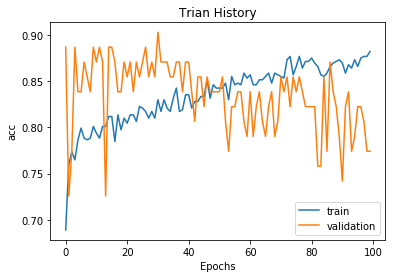

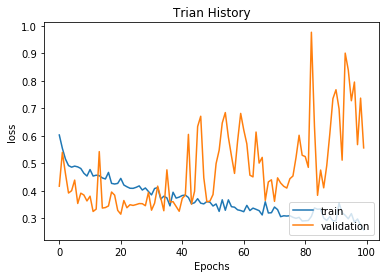

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Trian History')
    plt.ylabel(train)
    plt.xlabel("Epochs")
    plt.legend(['train','validation'],loc='lower right')
    plt.show()
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [27]:
predictions = model.predict_classes(x_test)
ids = test_df['PassengerId'].copy()
new_output = ids.to_frame()
new_output["Survived"]=predictions
new_output.head(10)

,PassengerId,Survived
0,1,0
3,4,1
7,8,0
11,12,1
14,15,1
16,17,0
18,19,1
19,20,1
30,31,0
32,33,1
